In [4]:
import numpy as np
import mediapipe as mp
import cv2
from matplotlib import pyplot as plt

In [5]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [6]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=6),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=4),
                                         )
            
        
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

### Calculate Angles

In [7]:
joint_list = [[8,7,6], [12,11,10], [16,15,14], [20,19,18]]

In [8]:
def draw_finger_angles(image, results, joint_list):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
                
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [640, 480]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    return image


In [9]:
test_image = draw_finger_angles(image, results, joint_list)

In [10]:
test_image

array([[[134, 157, 151],
        [144, 166, 160],
        [148, 166, 159],
        ...,
        [ 80,  96,  96],
        [ 75,  95,  96],
        [ 75,  95,  96]],

       [[130, 157, 152],
        [131, 158, 154],
        [149, 165, 157],
        ...,
        [ 80,  97,  94],
        [ 77,  96,  93],
        [ 77,  96,  93]],

       [[134, 156, 152],
        [135, 157, 154],
        [144, 162, 157],
        ...,
        [ 81,  95,  93],
        [ 79,  98,  88],
        [ 79,  98,  88]],

       ...,

       [[ 91,  83,  66],
        [ 89,  81,  64],
        [ 85,  78,  63],
        ...,
        [122, 115, 101],
        [124, 115, 101],
        [124, 115, 101]],

       [[ 92,  82,  65],
        [ 90,  79,  63],
        [ 85,  77,  62],
        ...,
        [124, 115, 101],
        [121, 115,  98],
        [121, 115,  98]],

       [[ 91,  81,  64],
        [ 90,  79,  63],
        [ 86,  75,  61],
        ...,
        [124, 115, 101],
        [123, 115,  98],
        [123, 115,  98]]

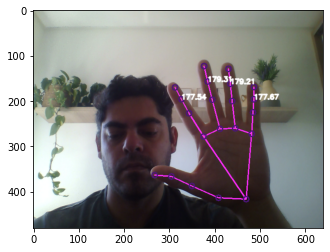

In [11]:
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
                
                # Render left or right detection
               # if get_label(num, hand, results):
                #    text, coord = get_label(num, hand, results)
                 #   cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Draw angles to image from joint list
            draw_finger_angles(image, results, joint_list)
            
        # Save our image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti